In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Chiranjeevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Assuming your dataset is in a CSV file
data = pd.read_csv('50_Startups.csv')

# Display the first few rows of the dataset
print(data.head())


   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [3]:
data.shape

(50, 4)

In [4]:
#View last five Rows of the Data Frame
data.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [5]:
data.sample(5)

,R&D Spend,Administration,Marketing Spend,Profit
10,101913.08,110594.11,229160.95,146121.95
39,38558.51,82982.09,174999.30,81005.76
27,72107.60,127864.55,353183.81,105008.31
43,15505.73,127382.30,35534.17,69758.98
44,22177.74,154806.14,28334.72,65200.33


In [6]:
#Describe the Data Frame Statistically
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Check the datatypes of Features
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [8]:
#Information about the Data Frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


## Visualization (Understanding Data through Visualization)

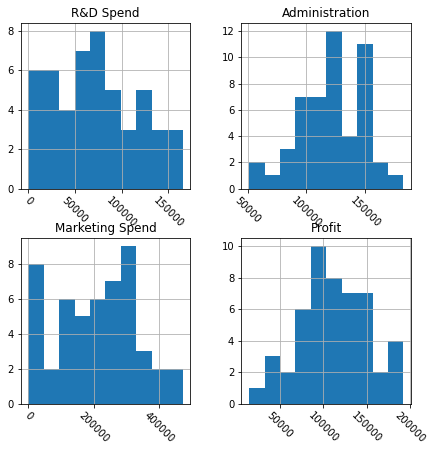

In [9]:
#Plot Histogram Grid
data.hist(xrot=-45, figsize=(7, 7))
plt.show()

## Correlation Matrix Plot

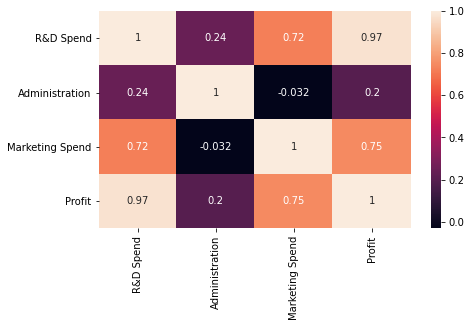

In [10]:
#Correlation Matrix for finding most significant variables
plt.figure(figsize=(7,4))
correlation = data.corr().round(4)
sns.heatmap(data=correlation,annot=True)
plt.show()

## Pair Plot Matrix

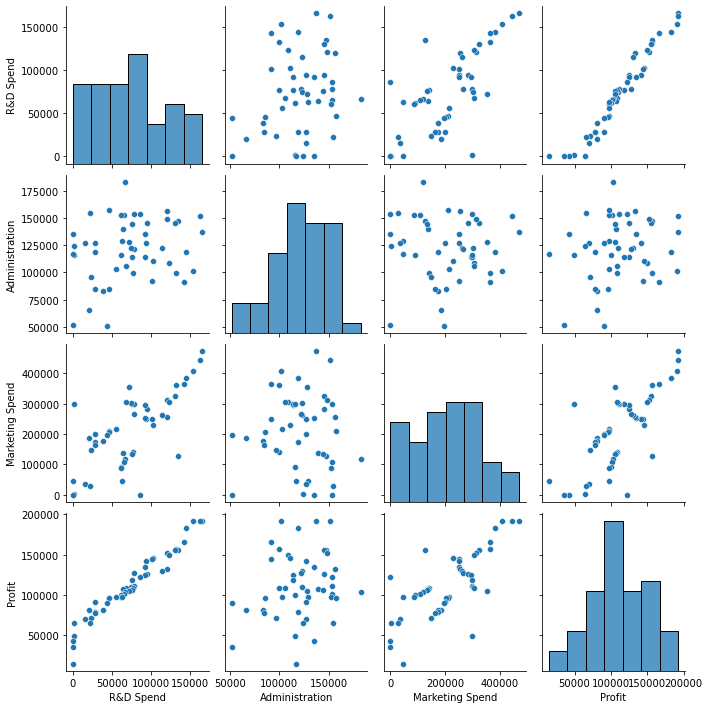

In [11]:
sns.pairplot(data)
plt.show()

## Density Plots

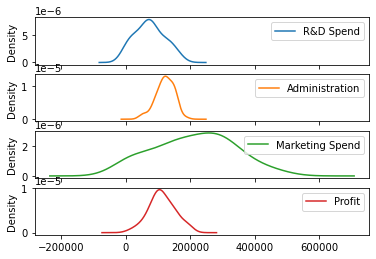

In [12]:
#Plot Density Graph
data.plot(kind='density', subplots=True, sharex=True)
plt.show()

## Visualization between Dependent And Independent Variables

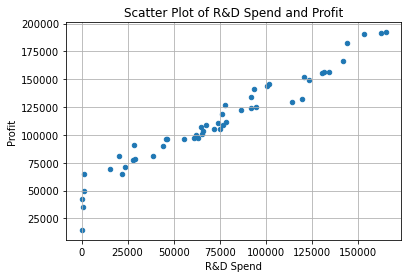

In [13]:
data.plot.scatter(x= 'R&D Spend', y= 'Profit')

# Set labels and title
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of R&D Spend and Profit')


# Display the plot
plt.grid()
plt.show()

## Data Cleaning

In [14]:
#Check the Number of Rows before removing Duplicates (if any)
data.shape

(50, 4)

In [15]:
data = data.drop_duplicates()

In [16]:
#Check the Number of Rows after removing Duplicates (if any)
data.shape

(50, 4)

No Duplicates in the given Dataset

## Check the null values

In [17]:
#Check for the NULL Values in the Dataset
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

No null values in the dataset

## Split the Data into Features (X) and Target (y) 

In [18]:
target_feature = 'Profit'

# Separate object for Traget feature
y = data[target_feature]

# Separate object for Input Features
X = data.drop(target_feature, axis=1)


## Split the Data into Training and Testing Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 3), (10, 3), (40,), (10,))

## Train Different Regression Models

In [21]:
# Train different regression models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()


linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)



RandomForestRegressor()

In [22]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)


In [23]:
# Evaluate the models
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

linear_metrics = evaluate_model(linear_predictions, y_test)
tree_metrics = evaluate_model(tree_predictions, y_test)
forest_metrics = evaluate_model(forest_predictions, y_test)


print("Linear Regression Metrics:", linear_metrics)
print("Decision Tree Metrics:", tree_metrics)
print("Random Forest Metrics:", forest_metrics)



Linear Regression Metrics: (40466511.9074821, 4695.351750844182, 0.9794909902425315)
Decision Tree Metrics: (211989076.56090003, 10299.666000000001, 0.8925608896164742)
Random Forest Metrics: (60737967.01209227, 6169.44707000005, 0.9692171254851971)


## Choose the Best Model

In [24]:
best_model = min([linear_metrics, tree_metrics, forest_metrics], key=lambda x: x[0])

if best_model == linear_metrics:
    print("Best Model: Linear Regression")
elif best_model == tree_metrics:
    print("Best Model: Decision Tree Regression")
else:
    print("Best Model: Random Forest Regression")


Best Model: Linear Regression


In [25]:
# Accuracy score for Linear Regression
LR = linear_model.score(X_test, y_test)
print("Linear Regression Model Accuracy Score:",LR * 100, '%')

Linear Regression Model Accuracy Score: 97.94909902425314 %
